# Coronavirus (COVID-19) Visualization & Prediction
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2019, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus.
 
 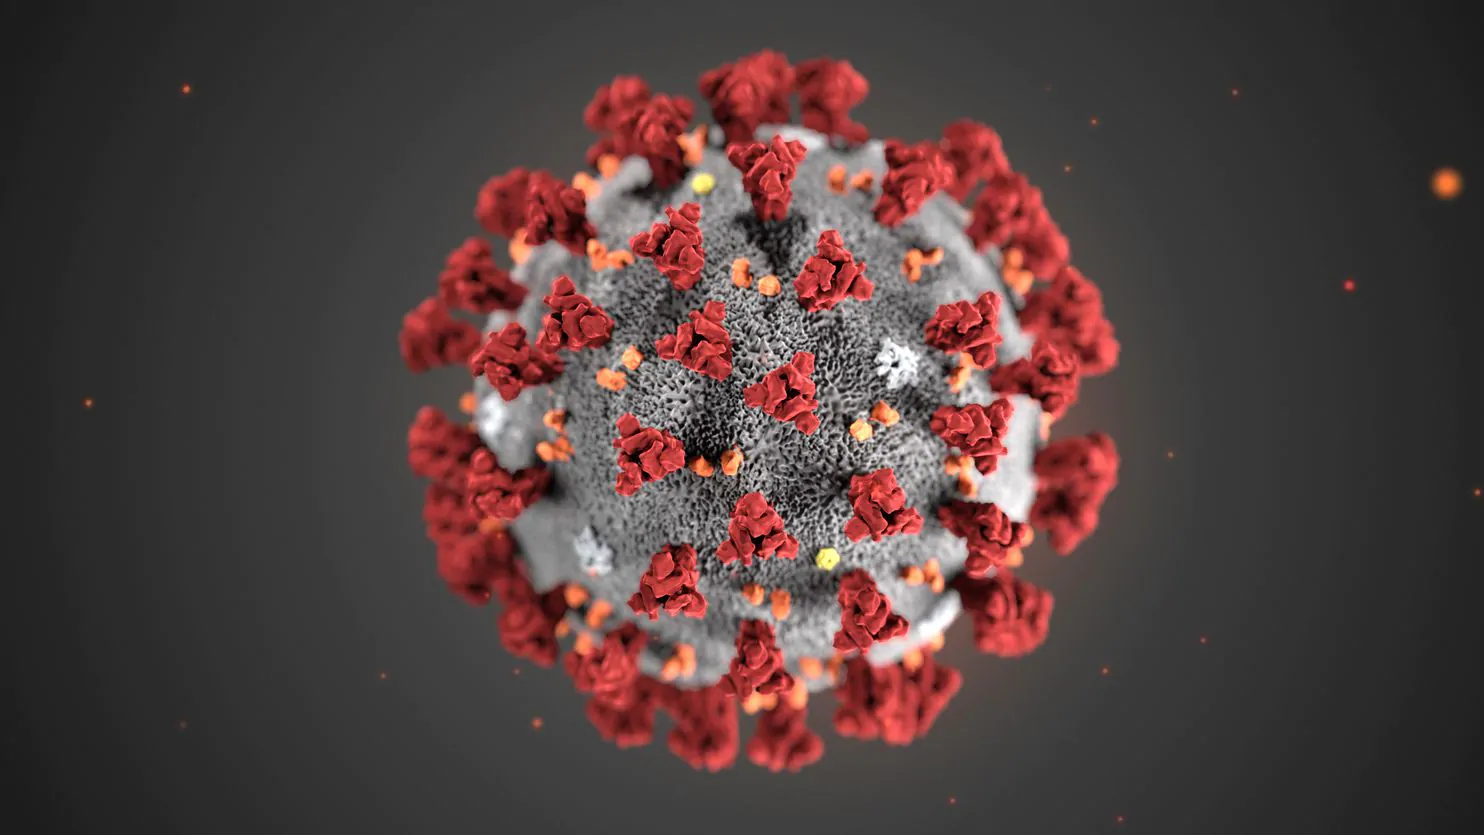
   
   <br><br>All the data sources have been taken from GitHub Repository of Center for Systems Science and Engineering (CSSE) at John Hopkins University. Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).
<a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University Git Repository

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
import datetime

Import the data 

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-13-2020.csv')

In [79]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864


In [75]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2174,2179,2181,2191,2191,2191,2191,2237,2244,2244
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1164,1170,1174,1181,1181,1190,1193,1199,1210,1217
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2737,2745,2751,2756,2762,2769,2772,2777,2782,2786
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,83,84,84,84,84,84,84,84,84,84
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,403,403,405,405,405,407,408,408,410,413


In [84]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41441,41543,41612,41727,41727,41727,41727,42530,42666,42666
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,32122,32700,33185,33634,33634,34353,34648,34996,35551,36102
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,66214,66550,66855,67127,67395,67611,67808,67999,68185,68383
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7318,7360,7384,7432,7463,7463,7517,7548,7585,7615
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,10354,10627,10859,11044,11146,11189,11223,11266,11376,11477


Get all the dates for the outbreak

In [65]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/28/20', '12/29/20', '12/30/20', '12/31/20', '1/1/21', '1/2/21',
       '1/3/21', '1/4/21', '1/5/21', '1/6/21'],
      dtype='object', length=355)

In [66]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [67]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,0,0,0,0,0,0,0,0,0,0,...,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105
1,0,0,0,0,0,0,0,0,0,0,...,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008
2,0,0,0,0,0,0,0,0,0,0,...,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120
3,0,0,0,0,0,0,0,0,0,0,...,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348
4,0,0,0,0,0,0,0,0,0,0,...,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864


In [68]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21
0,0,0,0,0,0,0,0,0,0,0,...,2174,2179,2181,2191,2191,2191,2191,2237,2244,2244
1,0,0,0,0,0,0,0,0,0,0,...,1164,1170,1174,1181,1181,1190,1193,1199,1210,1217
2,0,0,0,0,0,0,0,0,0,0,...,2737,2745,2751,2756,2762,2769,2772,2777,2782,2786
3,0,0,0,0,0,0,0,0,0,0,...,83,84,84,84,84,84,84,84,84,84
4,0,0,0,0,0,0,0,0,0,0,...,403,403,405,405,405,407,408,408,410,413


In [69]:
dates = confirmed.keys()

world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
india_cases = []

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
india_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
india_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates 
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    # Countries' total cases list
    china_cases . append( confirmed_df [confirmed_df ['Country/Region'] == 'China'][i] . sum())
    italy_cases . append( confirmed_df [confirmed_df ['Country/Region'] == 'Italy'][i] . sum())
    us_cases . append( confirmed_df [confirmed_df ['Country/Region'] == 'US'][i] . sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    
    # Countries' deaths list
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    
    # Countries' recovery list
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())

### World Senerio

In [70]:
print("Total Cases : "+str(confirmed_sum))
print("Deaths : "+str(death_sum))
print("Recovered : "+str(recovered_sum))

Total Cases : 87186540
Deaths : 1883761
Recovered : 48777336


### Last Updated Count for India, US, China, Italy

In [71]:
print("COUNTRY  _:_  TOTAL  _:_ DEATHS")    
print("\nUS       :  "+str(us_cases[-1])+"  :  "+str(us_deaths[-1]))
print("\nINDIA    :  "+str(india_cases[-1])+"  :  "+str(india_deaths[-1]))
print("\nITALY    :  "+str(italy_cases[-1])+"   :  "+str(italy_deaths[-1]))
print("\nCHINA    :  "+str(china_cases[-1])+"     :  "+str(china_deaths[-1]))

COUNTRY  _:_  TOTAL  _:_ DEATHS

US       :  21299340  :  361123

INDIA    :  10395278  :  150336

ITALY    :  2201945   :  76877

CHINA    :  96398     :  4788


### Getting daily increases

In [72]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
india_daily_increase = daily_increase(india_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
india_daily_death = daily_increase(india_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

### Change from Yesterday's Update

In [73]:
print("Change in Total Cases : "+str(world_daily_increase[-1]))
print("Change in Deaths : "+str(world_daily_death[-1]))
print("Change in Recovered : "+str(world_daily_recovery[-1]))

Change in Total Cases : 777203
Change in Deaths : 14982
Change in Recovered : 312855


### Last Change in Count for India, US, China, Italy

In [16]:
print("COUNTRY _:_ TOTAL _:_ DEATHS")            
print("\nUS    :  "+str(us_daily_increase[-1])+"  :  "+str(us_daily_death[-1]))
print("\nINDIA  :  "+str(india_daily_increase[-1])+"  :  "+str(india_daily_death[-1]))
print("\nITALY  :  "+str(italy_daily_increase[-1])+"  :  "+str(italy_daily_death[-1]))
print("\nCHINA  :  "+str(china_daily_increase[-1])+"  :  "+str(china_daily_death[-1]))

COUNTRY _:_ TOTAL _:_ DEATHS

US    :  249735  :  3854

INDIA  :  20346  :  222

ITALY  :  20326  :  548

CHINA  :  88  :  1


In [17]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Future forcasting
<a id='predictions'></a>

In [18]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [19]:
#adjusted_dates  # no of days from 22 January 2020 till yesterday
#future_forcast  # counting 10 more future days for prediction
days_in_future

10

### Convert integer into datetime for better visualization

In [20]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [21]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

## Model for predicting no. of confirmed cases.

### SVM  

In [85]:
# use this to find the optimal parameters for SVR
#kernel = ['linear','poly',]
#c = [0.01, 0.1, 1]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]
#degree = [3, 4, 5]

#svm_grid = {'kernel':kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

#svm = SVR()
#svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
#svm_search.fit(X_train_confirmed, y_train_confirmed)

In [86]:
# svm_search.best_params_

In [24]:
# svm_confirmed = svm_search.best_estimator_

svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)

svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


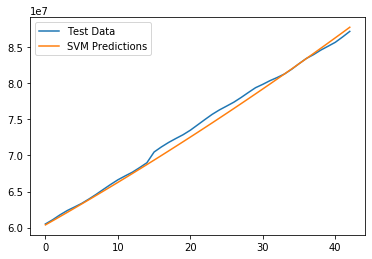

In [25]:
# check against testing data (world cases list)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])

# Predictions for coronavirus cases worldwide
<a id='prediction_display'></a>

In [26]:
# Function for displaying graph

def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(9, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('No. of Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('No. of Cases', size=15)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 15})
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

# Support Vector Machine Prediction

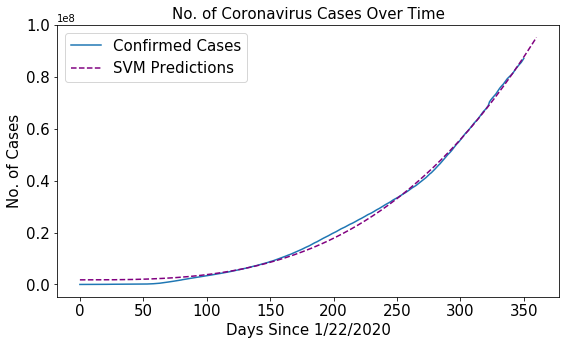

In [27]:
# Function call for graph

plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple') 

In [28]:
# Future predictions using SVM 

svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,01/07/2021,88500398.0
1,01/08/2021,89243746.0
2,01/09/2021,89991330.0
3,01/10/2021,90743161.0
4,01/11/2021,91499252.0
5,01/12/2021,92259615.0
6,01/13/2021,93024261.0
7,01/14/2021,93793204.0
8,01/15/2021,94566454.0
9,01/16/2021,95344023.0


#  Graphing the number of confirmed cases, active cases, deaths and recoveries.
 <a id='world_wide_graphs'></a>

In [29]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

def plot_worldcounts(y, title):
    plt.figure(figsize=(8, 5))
    plt.plot(adjusted_dates, y)
    plt.title(title, size=15)
    plt.xlabel('Days Since 22/01/2020', size=15)
    plt.ylabel('No. of Cases', size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

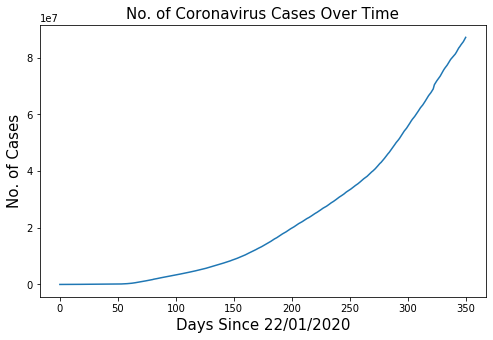

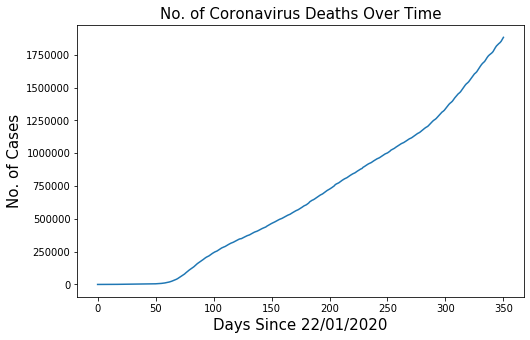

In [30]:
plot_worldcounts(world_cases,'No. of Coronavirus Cases Over Time')

plot_worldcounts(total_deaths,'No. of Coronavirus Deaths Over Time')


# World Daily Change

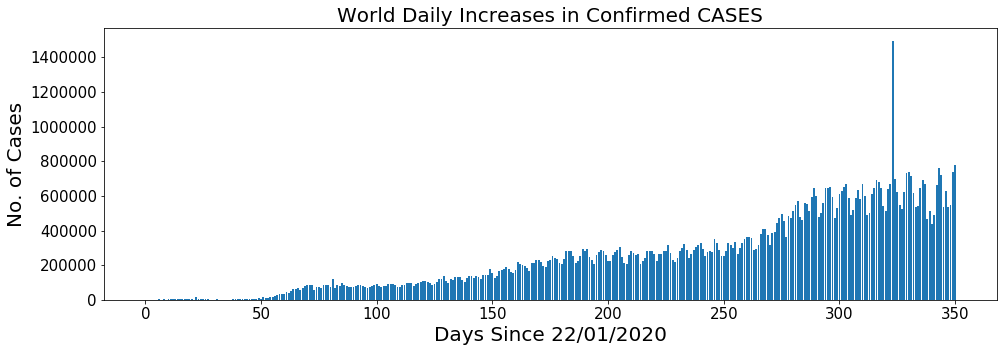

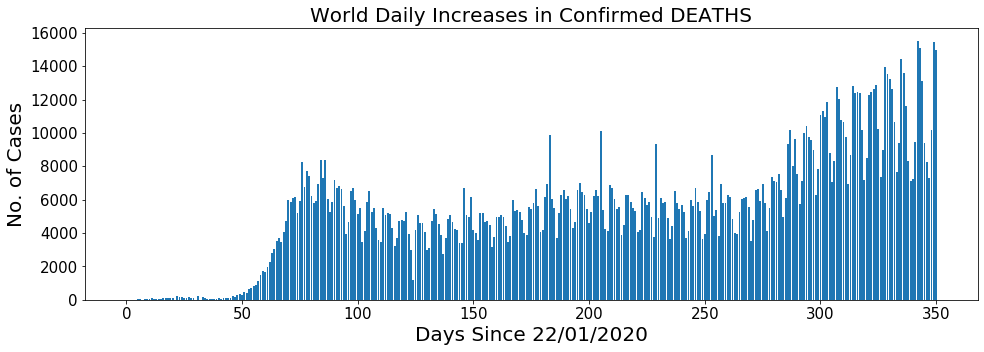

In [31]:
def plot_dailychange(y,title):
    plt.figure(figsize=(16, 5))
    plt.bar(adjusted_dates, y)
    plt.title(title, size=20)
    plt.xlabel('Days Since 22/01/2020', size=20)
    plt.ylabel('No. of Cases', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

plot_dailychange(world_daily_increase,'World Daily Increases in Confirmed CASES')

plot_dailychange(world_daily_death,'World Daily Increases in Confirmed DEATHS')

# Country Specific Graphs
<a id='country_graphs'></a>

In [37]:
def country_plot(x,y1, y2, y3, country):
    plt.figure(figsize=(9, 5))
    plt.plot(x, y1)
    plt.title('{} Confirmed Cases'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

    plt.figure(figsize=(9, 5))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

    plt.figure(figsize=(9, 5))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=15)
    plt.xlabel('Days Since 1/22/2020', size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()

## Graphs for India

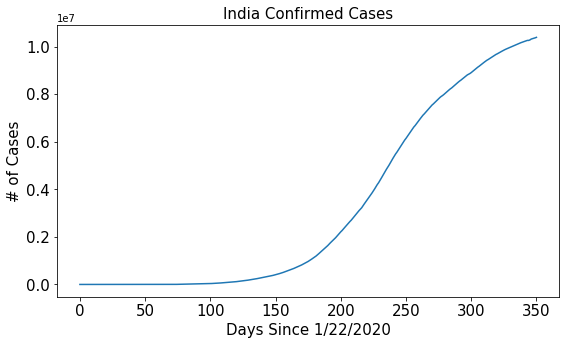

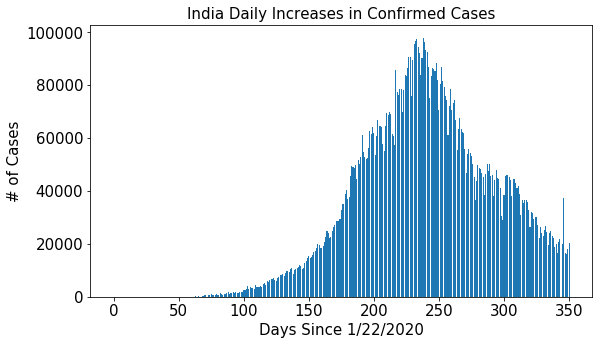

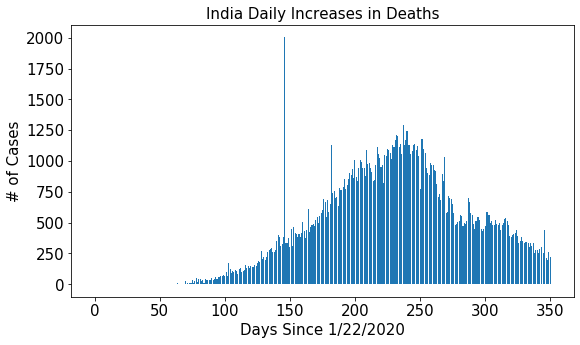

In [38]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, 'India')

## Graphs for China

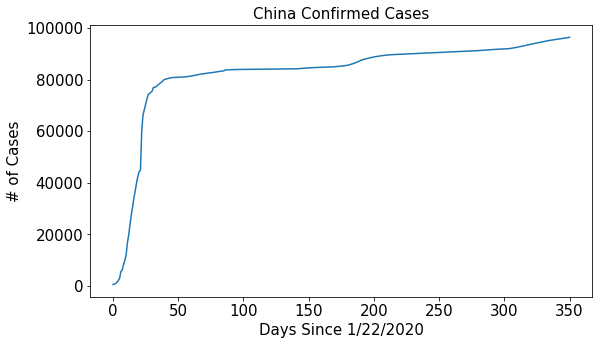

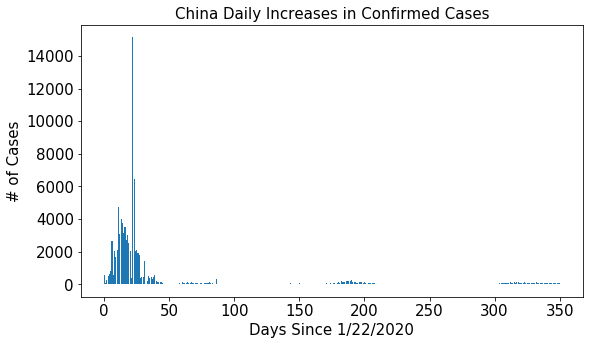

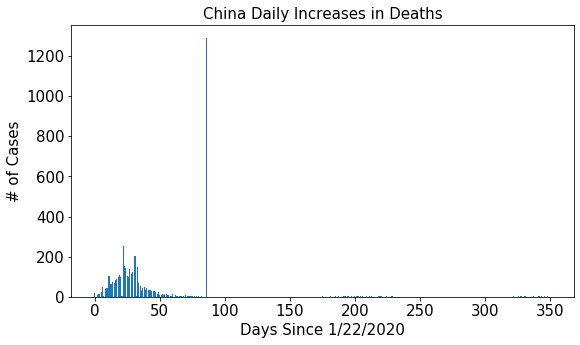

In [34]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, 'China')

## Graphs for Italy 

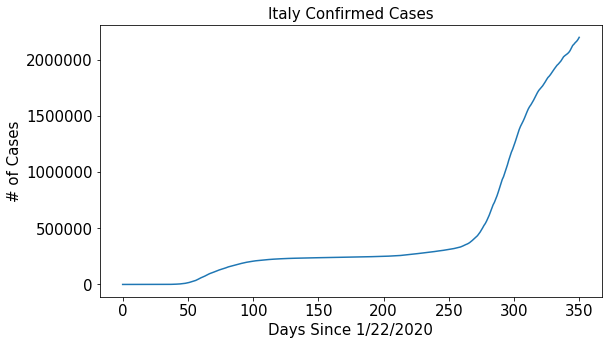

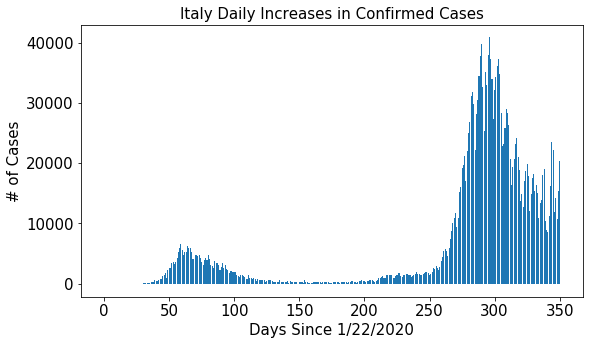

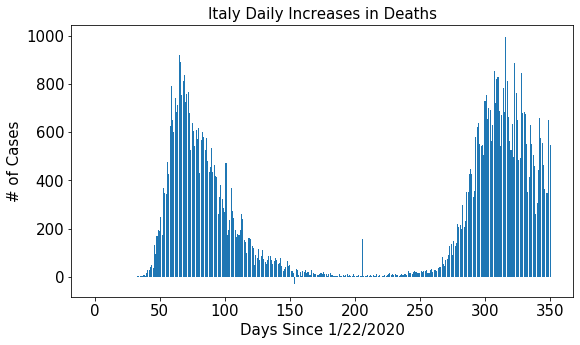

In [39]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, 'Italy')

## Graphs for US 

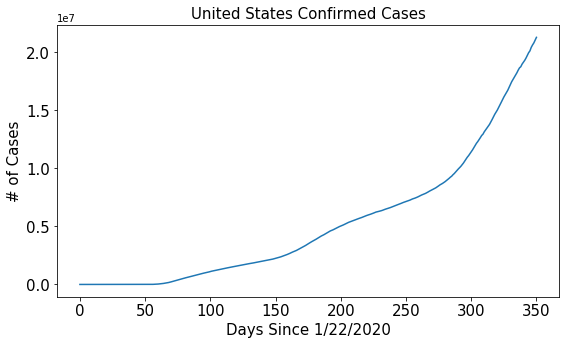

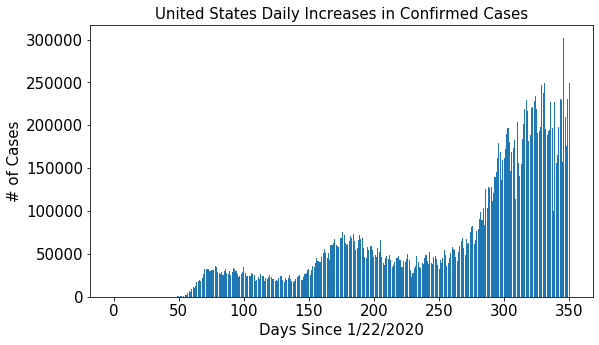

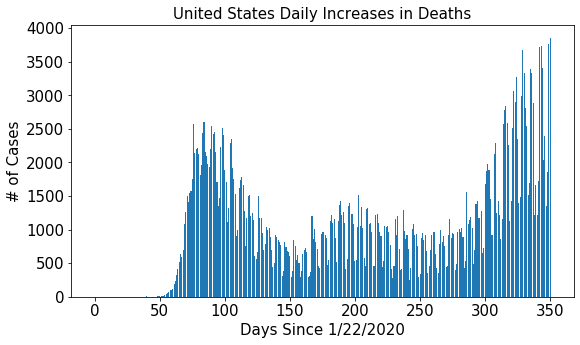

In [40]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, 'United States')

# Comparing the trends in India, China, US, Italy together

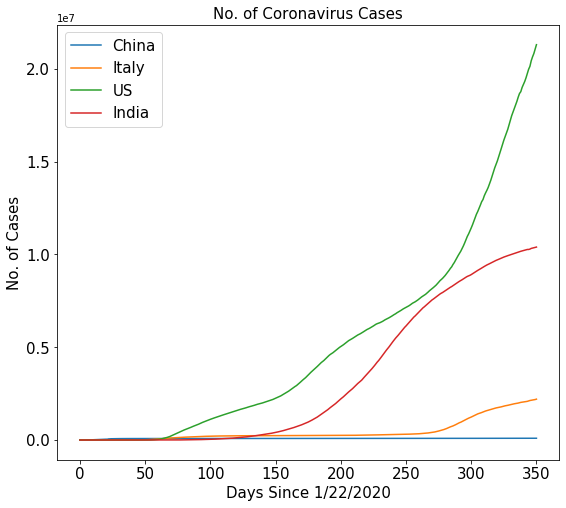

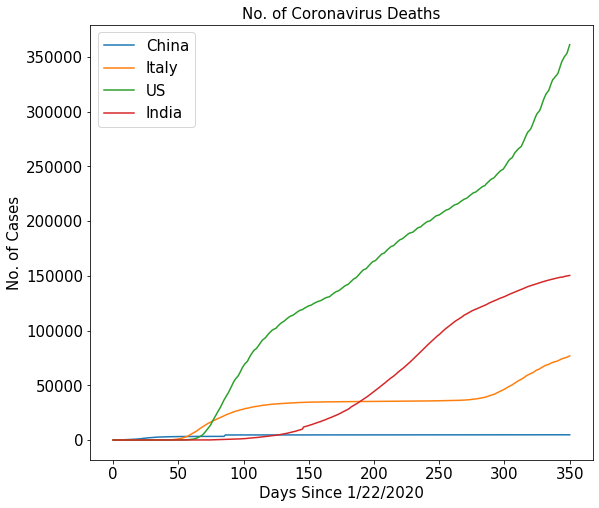

In [41]:
plt.figure(figsize=(9, 8))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, india_cases)

plt.title('No. of Coronavirus Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No. of Cases', size=15)
plt.legend(['China', 'Italy', 'US', 'India'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

plt.figure(figsize=(9, 8))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, india_deaths)

plt.title('No. of Coronavirus Deaths', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('No. of Cases', size=15)
plt.legend(['China', 'Italy', 'US', 'India'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Mortality Rate (worldwide) **susceptible to change **

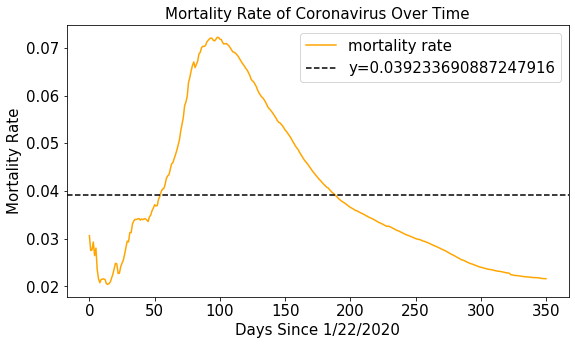

In [42]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(9, 5))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=15)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 15})
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Mortality Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Recovery Rate (worldwide) **suceptible to change **

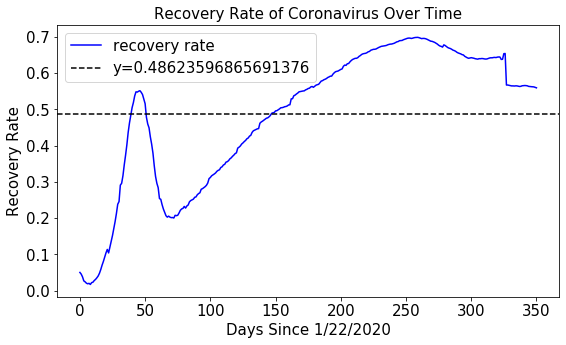

In [43]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(9, 5))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=15)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 15})
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Recovery Rate', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

## Getting information about countries/regions that have confirmed coronavirus cases

In [44]:
unique_countries = list(latest_data['Country_Region'].unique())

In [45]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted( zip( unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region'] == unique_countries[i]]['Confirmed'].sum()
    
    country_death_cases.append( latest_data[latest_data['Country_Region'] == unique_countries[i]]['Deaths'].sum())
    
    country_recovery_cases.append( latest_data[latest_data['Country_Region'] == unique_countries[i]]['Recovered'].sum())
    
    country_active_cases.append( country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    
    country_mortality_rate.append( country_death_cases[i] / country_confirmed_cases[i])

### Data table

In [46]:
country_df = pd.DataFrame({  'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                             'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                             'Number of Active Cases' : country_active_cases,'Mortality Rate': country_mortality_rate  })
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,16345678,299530,6298082,9748066,0.018325
1,India,9884100,143355,9388159,352586,0.014504
2,Brazil,6901952,181402,6138349,582201,0.026283
3,Russia,2629699,46404,2086887,496408,0.017646
4,France,2432559,58015,182685,2191859,0.023849
5,United Kingdom,1854490,64267,4013,1786210,0.034655
6,Italy,1843712,64520,1093161,686031,0.034995
7,Turkey,1836728,16417,1603780,216531,0.008938
8,Spain,1730575,47624,150376,1532575,0.027519
9,Argentina,1498160,40766,1335317,122077,0.027211


<a id='bar_charts'></a>
# Bar Chart Visualizations for COVID-19

### Comparing cases Within India with Outside of India   

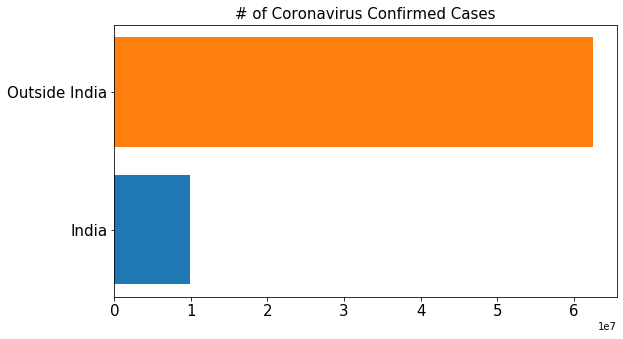

In [54]:
india_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_india_confirmed = np.sum(country_confirmed_cases) - india_confirmed
plt.figure(figsize=(9, 5))
plt.barh('India', india_confirmed)
plt.barh('Outside India', outside_india_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [55]:
print('Outside India {} cases:'.format(outside_india_confirmed))
print('India {} cases'.format(india_confirmed))

Outside India 62462847 cases:
India 9884100 cases


# Visual Representations (bar charts and pie charts)

### For Countries 

In [56]:
# Only show 15 countries with the most confirmed cases, the rest are grouped into the other category

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[15:])

for i in range(len(country_confirmed_cases[:15])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [57]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(9, 5))
    plt.barh(x, y)
    plt.title(title, size=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

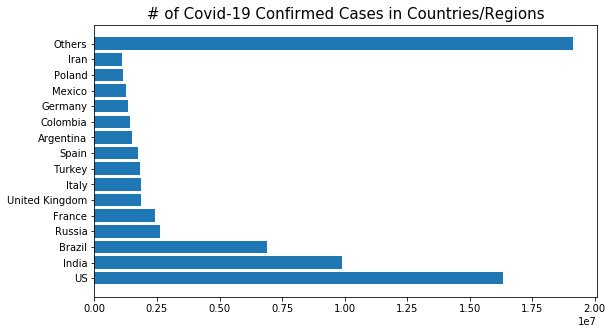

In [58]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

### For Provinces

In [59]:
# Only show 15 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[15:])
for i in range(len(province_confirmed_cases[:15])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

In [77]:
nan_indices = [] 

# handling nan , it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

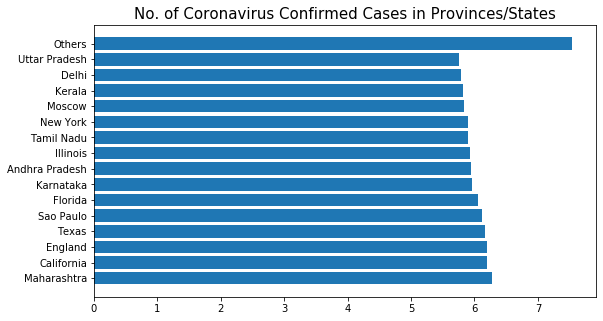

In [61]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'No. of Coronavirus Confirmed Cases in Provinces/States')

<a id='pie_charts'></a>
# Pie Chart Visualizations for COVID-19

In [62]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(15,8))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=10)
    plt.show()

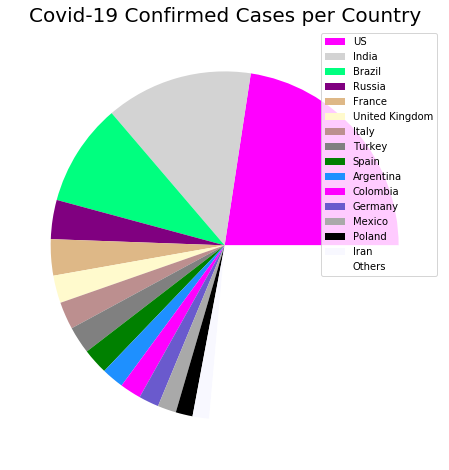

In [63]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')